In [74]:
import pandas as pd
from src.finance_get import GetData
from src.model_ensemble import GbmModel
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [75]:
ticker_symbol = 'CL=F'
df = yf.download(ticker_symbol)
df = pd.DataFrame(df)
df.index

[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['2000-08-23', '2000-08-24', '2000-08-25', '2000-08-28',
               '2000-08-29', '2000-08-30', '2000-08-31', '2000-09-01',
               '2000-09-05', '2000-09-06',
               ...
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-05', '2024-07-08'],
              dtype='datetime64[ns]', name='Date', length=5993, freq=None)

In [24]:
df['date'] = df.index
df['day_of_week'] = df['date'].dt.dayofweek 
df['month'] = df['date'].dt.month 
df['day'] = df['date'].dt.day

In [62]:
df.to_markdown('df.md')

In [76]:
get_obj = GetData(ticker_symbol='CL=F')
val_df, vol_df = get_obj.val_vol_datasets(lags=30,step=5)
model = GbmModel(val=val_df, vol= vol_df,n_X=25)
X_train, X_test, y_train, y_test= model.splitting_sum_vol()


[*********************100%%**********************]  1 of 1 completed


In [77]:
X_train[['t0','t1','t2','t3','t4','t22','t23','t24','sum_vol']].iloc[:5].to_markdown('trainhead.md')

In [65]:
X_train.to_markdown('train.md')

In [78]:
import pickle
with open('model_xg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [79]:
y_pred = loaded_model.predict(X_test)

In [80]:
y_test.reset_index(drop=True,inplace=True)

In [81]:
def get_df(i:int=0):
    one_xtest = X_test.drop(columns='sum_vol').iloc[i].values.tolist()
    one_xtest_withnulls = one_xtest + [None]*5

    onepred = y_pred[i].tolist()
    onepred_withnulls = [None]*25 + onepred

    one_ytest = y_test.iloc[i].values.tolist()
    one_ytest_withnulls = [None]*25 + one_ytest

    one_true = X_test.drop(columns='sum_vol').iloc[i].values.tolist() + y_test.iloc[i].values.tolist()

    df_oneexemple = pd.DataFrame({
        'one_true': one_true,
        'one_x': one_xtest_withnulls,
        'one_pred' : onepred_withnulls,
        'one_y' : one_ytest_withnulls
    })
    return df_oneexemple

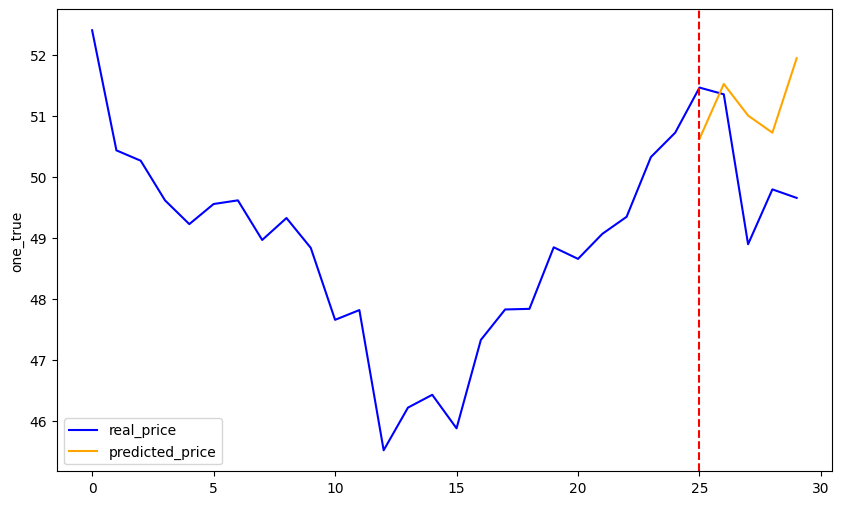

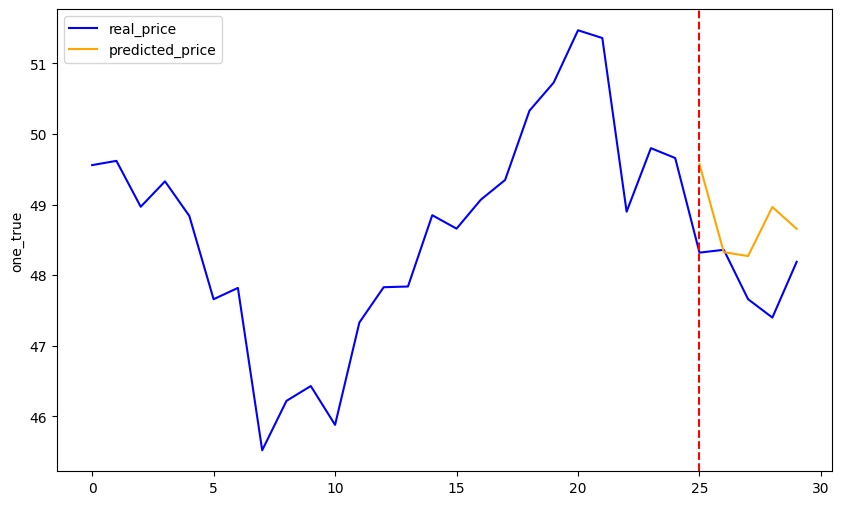

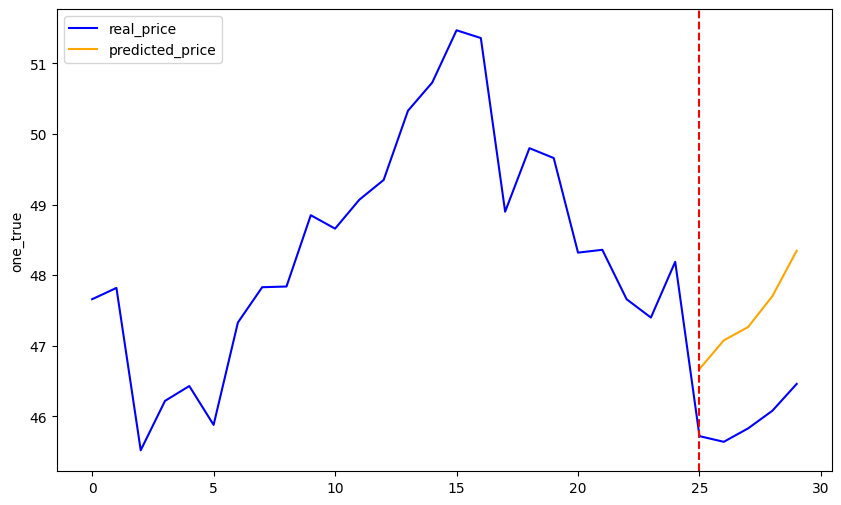

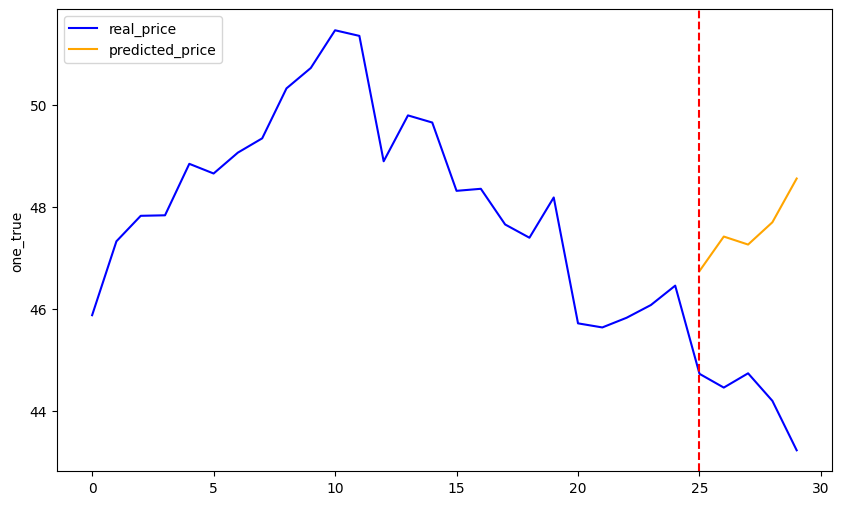

In [82]:
for i in range(4):
    df_oneexemple = get_df(i)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_oneexemple['one_true'], color='blue', label='real_price')
    sns.lineplot(data=df_oneexemple['one_pred'], color='orange', label='predicted_price')
    plt.axvline(x=25, color='r', linestyle= '--')
    plt.legend()
    plt.show()